# Intent Detection
> **Text Classification Problem** to `identify the Glorious Purpose` of `user's utterance.` It is very crucial for **Text-Based** applications like Chatbots where both the Inputs and Outputs are in the form of texts.

## Key Points

* **Knowledge distillation** is a technique that **transfers knowledge** from `Larger Complex Model to Smaller Simple Model`.

* **Quantization** is a technique that **reduces precision** of `model weights and activation functions` to **speed up inference** and **save memory**.

* **Pruning** is a technique that **removes redundant model parameters** to `reduce model size and model complexity`.

## Scenario

Let's say I am making **Jarvis** to help me with Stock Market. So when I ask Jarvis "`Hey, I have done some savings, I want to invest some of it in the Stock Market for stable monthly income of 6%...`", then Jarvis should be able to auto categorize it as "`Investing`" intent. And when I ask Jarvis something out of the scope like "`Find me a date...`", then Jarvis should say "`👎🏻 You are not eligible. Focus on your Finance instead, that's more future-proof...`".

## Data
> **CLINC150** A dataset for **intent detection** with 150 intents in 10 domains and out-of-scope examples.

**Purpose**: To test intent detection models on realistic and challenging queries that may not fit any intent.

**Size**: The dataset has **23,700** examples in total, with **22,500 in-scope examples** and **1,200 out-of-scope examples**.

* The **in-scope examples** are divided into 100 train, 20 validation, and 30 test sets examples per intent class.
    
* The **out-of-scope examples** are divided into 100 train, 100 validation, and 1,000 test examples.

**Variants**: The dataset has four variants:

* **data_full** variant is the main version of the dataset, with 100 train examples per in-scope class.

* **data_small** variant has 50 train examples per in-scope class.

* **data_imbalanced** variant has either 25, 50, 75, or 100 train examples per in-scope class, randomly assigned.

* **data_oos_plus** variant is the same as data_full, except it has 250 out-of-scope train examples.

**Benchmarks**: The dataset has been used to benchmark various intent classification models, such as **BERT, RoBERTa**, and **DSSCC**. The models are evaluated on their `accuracy` and `F1-score` on the in-scope and out-of-scope test sets.

* The **current state-of-the-art model** is `RoBERTa-Large + ICDA`, which achieves **98.9% accuracy** and **98.8% F1-score** on the in-scope test set, and **95.7% accuracy** and **95.6% F1-score** on the out-of-scope test set.

**Source**: A paper by Larson et al [“An Evaluation Dataset for Intent Classification and Out-of-Scope Prediction”](https://archive.ics.uci.edu/dataset/570/clinc150).

## Get Started

In [1]:
from transformers import pipeline

In [2]:
model_checkpoint="transformersbook/bert-base-uncased-finetuned-clinc"
pipe=pipeline(
    task="text-classification",
    model=model_checkpoint
)

In [3]:
query = """Hey, I'd like to rent a vehicle from Nov 1st to Nov 15th in
Paris and I need a 15 passenger van"""
pipe(query)

[{'label': 'car_rental', 'score': 0.5490034222602844}]

In [4]:
query = """Hey, I have done some savings, I want to invest some of it in
the Stock Market for stable monthly income of 6%..."""
pipe(query)

[{'label': 'direct_deposit', 'score': 0.10692153126001358}]

In [5]:
query = """Find me a date..."""
pipe(query)

[{'label': 'date', 'score': 0.5273398756980896}]

## Creating a Performance Benchmark

### Model performance

How well does our model perform on a well-crafted test set that reflects production data? This is especially important when the cost of making errors is large (and best mitigated with a human in the loop), or when we need to run inference on millions of examples and small improvements to the model metrics can translate into large gains in aggregate.

### Latency

How fast can our model deliver predictions? We usually care about latency in real-time environments that deal with a lot of traffic, like how Stack Overflow needed a classifier to quickly detect unwelcome comments on the website.

### Memory

How can we deploy billion-parameter models like GPT-2 or T5 that require giga-bytes of disk storage and RAM? Memory plays an especially important role in mobile or edge devices, where a model has to generate predictions without access to a powerful cloud server.

The text explains the importance of evaluating the model performance on a test set that is similar to the real-world data that the model will encounter in production. The text also mentions some scenarios where the model performance can have a significant impact on the outcome, such as when the model errors are costly or when the model is applied to a large scale of data. The text implies that the model performance should be measured by appropriate metrics that reflect the desired objectives and trade-offs.

* **Model performance**: How well the model can predict the correct labels for the input data.

* **Test set**: A subset of data that is used to evaluate the model performance after training. The test set should reflect the production data as much as possible.

* **Cost of errors**: The potential negative consequences of the model making wrong predictions, such as losing customers, money, or reputation. Errors can be reduced by involving a human expert to check or correct the model outputs.

* **Scale of inference**: The amount of data that the model needs to process and make predictions for. A large scale of inference can amplify the benefits or drawbacks of the model performance.

## Performance Benchmark
>  Use the `test set` to benchmark models.

In [6]:
class PerformanceBenchmark:
    def __init__(self, pipeline, dataset, optim_type="BERT baseline"):
        self.pipeline=pipeline
        self.dataset=dataset
        self.optim_type=optim_type # keep track of different optimization techniques

    def computeAccuracy(self):
        pass

    def computeSize(self):
        pass

    def timePipeline(self):
        pass

    def runBenchmark(self):
        metrics:dict[str,set|dict] = dict() # collect all the metrics in dictionary, with keys given by optim_type
        metrics[self.optim_type]=self.computeSize()
        metrics[self.optim_type].update(self.timePipeline())
        metrics[self.optim_type].update(self.computeAccuracy())
        return metrics

In [7]:
! pip install datasets -Uqq

In [8]:
from datasets import load_dataset

data=load_dataset(
    path="clinc_oos",
    name="plus", # refers to the subset containing out-of-scope training examples
    trust_remote_code=True
)

In [9]:
data

DatasetDict({
    train: Dataset({
        features: ['text', 'intent'],
        num_rows: 15250
    })
    validation: Dataset({
        features: ['text', 'intent'],
        num_rows: 3100
    })
    test: Dataset({
        features: ['text', 'intent'],
        num_rows: 5500
    })
})

In [10]:
data["test"].features

{'text': Value(dtype='string', id=None),
 'intent': ClassLabel(names=['restaurant_reviews', 'nutrition_info', 'account_blocked', 'oil_change_how', 'time', 'weather', 'redeem_rewards', 'interest_rate', 'gas_type', 'accept_reservations', 'smart_home', 'user_name', 'report_lost_card', 'repeat', 'whisper_mode', 'what_are_your_hobbies', 'order', 'jump_start', 'schedule_meeting', 'meeting_schedule', 'freeze_account', 'what_song', 'meaning_of_life', 'restaurant_reservation', 'traffic', 'make_call', 'text', 'bill_balance', 'improve_credit_score', 'change_language', 'no', 'measurement_conversion', 'timer', 'flip_coin', 'do_you_have_pets', 'balance', 'tell_joke', 'last_maintenance', 'exchange_rate', 'uber', 'car_rental', 'credit_limit', 'oos', 'shopping_list', 'expiration_date', 'routing', 'meal_suggestion', 'tire_change', 'todo_list', 'card_declined', 'rewards_balance', 'change_accent', 'vaccines', 'reminder_update', 'food_last', 'change_ai_name', 'bill_due', 'who_do_you_work_for', 'share_locat

In [11]:
data["test"].to_pandas()

,text,intent
0,how would you say fly in italian,61
1,what's the spanish word for pasta,61
2,how would they say butter in zambia,61
3,how do you say fast in spanish,61
4,what's the word for trees in norway,61
...,...,...
5495,find my wallet,42
5496,can you give me the gps location of harvey,42
5497,where's my buddy steve right this second,42
5498,locate jenny at her present position,42


In [12]:
data["test"].features["intent"].int2str(values=[61,42])

['translate', 'oos']

In [13]:
data["test"].features["intent"].int2str

<bound method ClassLabel.int2str of ClassLabel(names=['restaurant_reviews', 'nutrition_info', 'account_blocked', 'oil_change_how', 'time', 'weather', 'redeem_rewards', 'interest_rate', 'gas_type', 'accept_reservations', 'smart_home', 'user_name', 'report_lost_card', 'repeat', 'whisper_mode', 'what_are_your_hobbies', 'order', 'jump_start', 'schedule_meeting', 'meeting_schedule', 'freeze_account', 'what_song', 'meaning_of_life', 'restaurant_reservation', 'traffic', 'make_call', 'text', 'bill_balance', 'improve_credit_score', 'change_language', 'no', 'measurement_conversion', 'timer', 'flip_coin', 'do_you_have_pets', 'balance', 'tell_joke', 'last_maintenance', 'exchange_rate', 'uber', 'car_rental', 'credit_limit', 'oos', 'shopping_list', 'expiration_date', 'routing', 'meal_suggestion', 'tire_change', 'todo_list', 'card_declined', 'rewards_balance', 'change_accent', 'vaccines', 'reminder_update', 'food_last', 'change_ai_name', 'bill_due', 'who_do_you_work_for', 'share_location', 'internati

In [14]:
intents = data["test"].features["intent"]

## computeAccuracy
> Accuracy is **effective** when the target feature's classes are `balanced`.

In [15]:
! pip install evaluate -Uqq

In [16]:
from evaluate import load

accuracy_score=load(path="accuracy")

In [17]:
# expects y_true(references), y_pred(predictions)
accuracy_score.compute(references=[5,3,7], predictions=[5,3,6])

{'accuracy': 0.6666666666666666}

In [18]:
sample=data["test"][0]["text"]
prediction=pipe(sample)
prediction_label=prediction[0]["label"]
prediction_id=data["test"].features["intent"].str2int(prediction_label)

print(sample)
print(prediction)
print(prediction_label,"--->", prediction_id)

how would you say fly in italian
[{'label': 'translate', 'score': 0.5855261087417603}]
translate ---> 61


In [19]:
for example in data["test"]:
    print(example)
    break

{'text': 'how would you say fly in italian', 'intent': 61}


In [20]:
def computeAccuracy(self):
    """Override the PerformanceBenchmark.computeAccuracy() method"""
    prediction_ids:[int]=[]
    labels:[str]=[]
    # intents=self.dataset["test"].features["intent"]

    for example in self.dataset["test"]:
        pred_label=self.pipeline(example["text"])[0]["label"]
        pred_id=intents.str2int(pred_label)
        prediction_ids.append(pred_id)

        label=example["intent"]
        labels.append(label)
    accuracy=accuracy_score.compute(references=labels, predictions=prediction_ids)
    print(f"Accuracy on test set ---> {accuracy['accuracy']:.4f}")
    return accuracy

# Override the PerformanceBenchmark.computeAccuracy() method
PerformanceBenchmark.computeAccuracy=computeAccuracy

In [21]:
list(pipe.model.state_dict().items())[42]

('bert.encoder.layer.2.attention.self.value.bias',
 tensor([-2.7834e-02,  4.9434e-02,  8.3551e-02,  4.1092e-02,  6.0157e-01,
          1.1774e-01, -5.2112e-02, -6.5143e-02, -2.9358e-02, -4.2250e-02,
          7.9177e-02,  8.0409e-02,  2.9921e-03,  1.7816e-01, -5.0480e-02,
         -1.5634e-01, -2.1707e-02,  1.4381e-02,  2.5132e-02, -2.4110e-02,
         -1.9183e-01, -7.8657e-02,  5.0709e-02,  3.3632e-02, -3.1946e-02,
          1.1616e-01,  9.2720e-02, -1.1787e-01,  2.3233e-01, -1.2678e-02,
         -1.3138e-01, -4.0024e-02,  7.4823e-02, -5.4148e-02, -1.5184e-01,
         -7.4407e-02,  1.1559e-01,  8.2729e-02, -1.3787e-01,  8.3528e-02,
          1.2154e-01,  1.6880e-02, -5.6629e-02, -3.9295e-02,  5.3725e-02,
          6.8602e-02, -1.1294e-01,  4.4001e-02, -2.5884e-01,  1.6767e-01,
          1.8316e-01,  5.6272e-02, -3.6874e-02, -2.7938e-02, -9.3204e-02,
         -7.5239e-03,  4.1141e-02, -1.1542e-02, -9.9749e-02, -3.0910e-02,
          4.1398e-02, -4.4389e-02, -2.6279e-02,  7.2100e-02, 

## computeSize

In [22]:
import torch
from pathlib import Path

torch.save(obj=pipe.model.state_dict(), f="model.pt")

In [23]:
Path("/content/model.pt").stat()

os.stat_result(st_mode=33188, st_ino=4728883, st_dev=52, st_nlink=1, st_uid=0, st_gid=0, st_size=438459014, st_atime=1703968193, st_mtime=1703968194, st_ctime=1703968194)

In [24]:
Path("/content/model.pt").stat().st_size

438459014

In [25]:
def computeSize(self):
    """Override the PerformanceBenchmark.compute_size() method"""
    state_dict=self.pipeline.model.state_dict()
    tmp_path=Path("model.pt")
    torch.save(obj=state_dict, f=tmp_path)
    # Calculate size in megabytes(MB)
    size_mb=Path(tmp_path).stat().st_size / (1024*1024)
    # Delete temporary file
    tmp_path.unlink()
    print(f"Model Size ---> {size_mb:.2f} mb")
    return {"size_mb":size_mb}
PerformanceBenchmark.computeSize=computeSize

A simple way to measure the execution time of a code snippet is to use the `perf_counter()` function from Python's `time` module. This function has a **better time resolution** than the `time.time()` function and is well suited for getting precise results.

## timePipeline
> Compute the average Latency from feeding input to getting output.

In [26]:
from time import perf_counter

for _ in range(3):
    start_time=perf_counter()
    _=pipe(data["test"][0]["text"])
    latency=perf_counter() - start_time
    print(f"Latency: {1000*latency:.3f} ms")

Latency: 130.030 ms
Latency: 119.545 ms
Latency: 121.527 ms


In [27]:
import numpy as np

def timePipeline(self, query="What is the pin number for my account?"):
    """Override the PerformanceBenchmark.time_pipeline() method"""
    latencies:[float]=[]
    # Warmup the CPU before performing actual timed run
    for _ in range(10):
        _=self.pipeline(query)
    # Timed Run
    for _ in range(100):
        start_time=perf_counter()
        _=self.pipeline(query)
        latency=perf_counter() - start_time
        latencies.append(latency)
    # Compute run statistics
    avg_time_in_ms=1000 * np.mean(latencies)
    std_time_in_ms=1000 * np.std(latencies)
    print(f"Latency: {avg_time_in_ms:.2f} ms +\- {std_time_in_ms:.2f} ms")
    return {
        "avg_time_in_ms":avg_time_in_ms,
        "std_time_in_ms":std_time_in_ms
    }

PerformanceBenchmark.timePipeline=timePipeline

In general, the `latency` will depend on the query length, and a good practice is to **benchmark your models with queries that they're likely to encounter in production environments**.

## Performance Benchmarking
> For the **baseline model**, we just need to pass the pipeline and the dataset we wish to perform the benchmark on.

In [28]:
performance_benchmark=PerformanceBenchmark(pipeline=pipe, dataset=data)
performance_metrics=performance_benchmark.runBenchmark()

Model Size ---> 418.15 mb
Latency: 132.33 ms +\- 9.53 ms
Accuracy on test set ---> 0.8673


* **Model Size** ---> 418.15 mb
* **Latency:** 132.33 ms +\- 9.53 ms
* **Accuracy** on test set ---> 0.8673

# Knowledge Distillation
> Making Models Smaller via Knowledge Distillation

* **Knowledge distillation**: A smaller model (student) to mimic the behavior of a slower, larger, but better-performing model (teacher).

* **Soft probabilities**: The teacher's confidence scores for each possible output, which give extra information to the student.

* **Dark knowledge**: The teacher's insights that are not captured by the labels alone, such as the similarity of different outputs.

* **History**: First used for ensemble models in 2006, then extended to deep neural networks in 2015.

* **Applications**: Used to `compress large pretrained language models` for practical use.

## Creating a Knowledge Distillation Trainer

To implement **knowledge distillation** we need to add a few things to the `Trainer` base class:

* The new hyperparameters `α` and `T`, which control the relative weight of the `distillation loss` and how much the probability distribution of the labels should be smoothed.

* The fine-tuned teacher model, which in our case is BERT-base.

* A new loss function that combines the cross-entropy loss with the knowledge distillation loss.

Adding the new hyperparameters is quite simple, since we just need to subclass `TrainingArguments` and include them as new attributes:

In [29]:
from transformers import TrainingArguments

class DistillationTrainingArguments(TrainingArguments):
    def __init__(self, *args, alpha=0.5, temperature=2.0, **kwargs):
        super().__init__(*args, **kwargs)
        self.alpha=alpha
        self.temperature=temperature


For the trainer itself, we need a new loss function. The way to implement this is by subclassing `Trainer` and overriding the `compute_loss()` method to include the `knowledge distillation loss` term $L_{KD}$.

* **Cross Entropy Loss:** measures how well the `student model predicts` the correct labels.

* **Knowledge Distillation Loss:** measures how well the `student model mimics` the teacher model's output.


In [30]:
import torch.nn as nn
import torch.nn.functional as F
from transformers import Trainer

class DistillationTrainer(Trainer):
    def __init__(self, *args, teacher_model=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.teacher_model=teacher_model

    def computeLoss(self, model, inputs, return_outputs=False):
        student_outputs=model(**inputs)
        # Extract Cross Entropy Loss and Logits from Student
        cross_entropy_loss=student_outputs.loss
        student_logits=student_outputs.logits

        # Extract logits from Teacher
        with torch.no_grad():
            teacher_outputs=self.teacher_model(**inputs)
            teacher_logits=teacher_outputs.logits
        # Soften Probabilities and Compute Distillation Loss
        loss_function=nn.KLDivLoss(reduction="batchmean")
        # Temperature
        T=self.args.temperature
        knowledge_distillation_loss=T ** 2 * loss_function(
            F.log_softmax(student_logits/T, dim=-1),
            F.softmax(teacher_logits/T, dim=-1)
        )

        # Return weighted student loss
        loss=self.args.alpha * cross_entropy_loss + (1. - self.args.alpha) * knowledge_distillation_loss
        return (loss, student_outputs) if return_outputs else loss

## Choosing a good student initialization

To make the student model **faster** and **more efficient**, we should pick a smaller model that has the `same architecture` as the `teacher model`. For example:
* Since our `teacher model` is `BERT`, we can use `DistilBERT` as the `student model`.

* DistilBERT has `40% fewer parameters` than BERT, but still `outperforms BERT` on many NLP tasks.

## Tokenizing and encoding queries

To feed the queries to the student model, we need to convert them into **numerical representations**. We can use the DistilBERT tokenizer for this purpose. The tokenizer splits the queries into subwords and assigns them unique IDs. It also adds special tokens and padding to make the queries have the same length.

In [31]:
from transformers import AutoTokenizer

student_checkpoint="distilbert-base-uncased"
student_tokenizer=AutoTokenizer.from_pretrained(
    pretrained_model_name_or_path=student_checkpoint
)

student_tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [32]:
data

DatasetDict({
    train: Dataset({
        features: ['text', 'intent'],
        num_rows: 15250
    })
    validation: Dataset({
        features: ['text', 'intent'],
        num_rows: 3100
    })
    test: Dataset({
        features: ['text', 'intent'],
        num_rows: 5500
    })
})

In [33]:
def tokenize_text(batch):
    return student_tokenizer(text=batch["text"], truncation=True)

# tokenize all the set of data
data_encoded=data.map(
    function=tokenize_text,
    batched=True,
    remove_columns=["text"]
)

data_encoded["train"].to_pandas()

Map:   0%|          | 0/5500 [00:00<?, ? examples/s]

,intent,input_ids,attention_mask
0,61,"[101, 2054, 3670, 2052, 1045, 2224, 2000, 2360...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,61,"[101, 2064, 2017, 2425, 2033, 2129, 2000, 2360...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,61,"[101, 2054, 2003, 1996, 5662, 1997, 1010, 1005...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
3,61,"[101, 2425, 2033, 2129, 2000, 2360, 1010, 1005...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,61,"[101, 2065, 1045, 2020, 17855, 1010, 2129, 205...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
...,...,...,...
15245,42,"[101, 2129, 2064, 1045, 2131, 2920, 1999, 1327...","[1, 1, 1, 1, 1, 1, 1, 1, 1]"
15246,42,"[101, 2003, 13272, 7965, 102]","[1, 1, 1, 1, 1]"
15247,42,"[101, 2054, 1005, 1055, 1996, 11346, 16289, 19...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
15248,42,"[101, 2040, 2038, 1996, 2087, 17073, 2006, 785...","[1, 1, 1, 1, 1, 1, 1, 1, 1]"


In [34]:
data_encoded=data_encoded.rename_column(
    original_column_name="intent",
    new_column_name="labels"
)

data_encoded["train"].to_pandas()

,labels,input_ids,attention_mask
0,61,"[101, 2054, 3670, 2052, 1045, 2224, 2000, 2360...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,61,"[101, 2064, 2017, 2425, 2033, 2129, 2000, 2360...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,61,"[101, 2054, 2003, 1996, 5662, 1997, 1010, 1005...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
3,61,"[101, 2425, 2033, 2129, 2000, 2360, 1010, 1005...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,61,"[101, 2065, 1045, 2020, 17855, 1010, 2129, 205...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
...,...,...,...
15245,42,"[101, 2129, 2064, 1045, 2131, 2920, 1999, 1327...","[1, 1, 1, 1, 1, 1, 1, 1, 1]"
15246,42,"[101, 2003, 13272, 7965, 102]","[1, 1, 1, 1, 1]"
15247,42,"[101, 2054, 1005, 1055, 1996, 11346, 16289, 19...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
15248,42,"[101, 2040, 2038, 1996, 2087, 17073, 2006, 785...","[1, 1, 1, 1, 1, 1, 1, 1, 1]"


* Here we've removed the `text` column since we no longer need it, and we've also `renamed` the `intent` column to `labels` so it can be automatically detected by the
trainer.

* Now that we've processed our texts, the next thing we need to do is define the hyperparameters and `compute_metrics()` function for our `DistillationTrainer`. We'll also push all of our models to the Hugging Face Hub.

### Pushing the model to the Hub

To share our model with the community, we can use the `push_to_hub()` method of the `DistillationTrainer` class, which uploads our model and its configuration to the Hugging Face Hub, a platform for hosting and collaborating on models. We can also use the `pipeline()` function from the `transformers` library to create an inference pipeline that can take a query and return the predicted intent.

In [35]:
from huggingface_hub import notebook_login
notebook_login()

### Define Compute Metrics

Next, we'll define the metrics to track during training. As we did in the performance benchmark, we'll use `accuracy` as the main metric. This means we can reuse our `accuracy_score()` function in the `compute_metrics()` function that we'll include in
`DistillationTrainer`.

In [36]:
def compute_metrics(pred):
    logits, labels=pred
    predictions=np.argmax(logits, axis=1)
    return accuracy_score.compute(
        predictions=predictions,
        references=labels
    )

In this function, the predictions from the sequence modeling head come in the form of logits, so we use the `np.argmax()` function to find the most confident class prediction and compare that against the ground truth label.

### TrainingArguments

To warm up we will set $\alpha = 1$ to see how well DistilBERT performs without any signal from the teacher. Then we will push our fine-tuned model to a new repo called `distilbert-base-uncased-finetuned-clinc`, which we need to specify in the `DistillationTrainingArguments`.

In [37]:
from enum import Enum

class ModelConfig(Enum):
    BATCH_SIZE=48
    EPOCHS=10
    LEARNING_RATE=2e-5
    DISTILLATION_ALPHA=1,
    WEIGHT_DECAY=0.01

In [38]:
!pip install transformers[torch] accelerate -Uqq

In [39]:
# path where the finetuned model will be saved
finetuned_checkpoint="distilbert-base-uncased-finetuned-clinc"

student_training_args=DistillationTrainingArguments(
    output_dir=finetuned_checkpoint,
    evaluation_strategy="epoch",
    num_train_epochs=ModelConfig.EPOCHS.value,
    learning_rate=ModelConfig.LEARNING_RATE.value,
    per_device_train_batch_size=ModelConfig.BATCH_SIZE.value,
    per_device_eval_batch_size=ModelConfig.BATCH_SIZE.value,
    alpha=ModelConfig.DISTILLATION_ALPHA.value,
    weight_decay=ModelConfig.WEIGHT_DECAY.value,
    push_to_hub=True
)

### Student init

The next thing to do is initialize a student model. Since we will be doing multiple runs with the trainer, we'll create a `student_init()` function to initialize the model with each new run. When we pass this function to the `DistillationTrainer`, this will ensure we initialize a new model
each time we call the `train()` method.


One other thing we need to do is provide the student model with the `mappings between each intent and label ID`. These mappings can be obtained from our `BERT base model` that we downloaded in the pipeline.

In [40]:
id2label=pipe.model.config.id2label
label2id=pipe.model.config.label2id

In [41]:
id2label[0], label2id["restaurant_reviews"]

('restaurant_reviews', 0)

In [42]:
from transformers import AutoConfig

num_labels = intents.num_classes
print(num_labels)

151


In [43]:
student_config=(AutoConfig.from_pretrained(
    pretrained_model_name_or_path=student_checkpoint,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id
))

student_config

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "restaurant_reviews",
    "1": "nutrition_info",
    "2": "account_blocked",
    "3": "oil_change_how",
    "4": "time",
    "5": "weather",
    "6": "redeem_rewards",
    "7": "interest_rate",
    "8": "gas_type",
    "9": "accept_reservations",
    "10": "smart_home",
    "11": "user_name",
    "12": "report_lost_card",
    "13": "repeat",
    "14": "whisper_mode",
    "15": "what_are_your_hobbies",
    "16": "order",
    "17": "jump_start",
    "18": "schedule_meeting",
    "19": "meeting_schedule",
    "20": "freeze_account",
    "21": "what_song",
    "22": "meaning_of_life",
    "23": "restaurant_reservation",
    "24": "traffic",
    "25": "make_call",
    "26": "text",
    "27": "bill_balance",
    "28": "improve_credit_score",
    

In [44]:
from transformers import AutoModelForSequenceClassification
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [45]:
def student_init():
    return (AutoModelForSequenceClassification.from_pretrained(
        pretrained_model_name_or_path=student_checkpoint,
        config=student_config
    ).to(device))

We now have all the ingredients needed for our `distillation trainer`, so let's load the teacher and fine-tune.

### Fine tune Teacher Model

In [46]:
teacher_checkpoint="transformersbook/bert-base-uncased-finetuned-clinc"

teacher_model = (AutoModelForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path=teacher_checkpoint,
    num_labels=num_labels
).to(device))

teacher_model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [47]:
distilbert_trainer=DistillationTrainer(
    model_init=student_init,
    teacher_model=teacher_model,
    args=student_training_args,
    train_dataset=data_encoded['train'],
    eval_dataset=data_encoded['validation'],
    compute_metrics=compute_metrics,
    tokenizer=student_tokenizer
)

distilbert_trainer

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
distilbert_trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,3.188742,0.736452
2,3.720500,1.581924,0.869677
3,3.720500,0.794062,0.909355
4,1.358500,0.480413,0.926129
5,0.441600,0.343733,0.937097
6,0.441600,0.287063,0.946452
7,0.181500,0.265658,0.945806
8,0.093100,0.258813,0.946129
9,0.093100,0.252438,0.945806
10,0.061800,0.250857,0.945484


Checkpoint destination directory distilbert-base-uncased-finetuned-clinc/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory distilbert-base-uncased-finetuned-clinc/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory distilbert-base-uncased-finetuned-clinc/checkpoint-1500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory distilbert-base-uncased-finetuned-clinc/checkpoint-2000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory distilbert-base-uncased-finetuned-clinc/checkpoint-2500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory distilbert-base-uncased-finetuned-clinc/checkpoint-3000 already exists and is non-empty.Savin

TrainOutput(global_step=3180, training_loss=0.9240431071827246, metrics={'train_runtime': 389.2983, 'train_samples_per_second': 391.73, 'train_steps_per_second': 8.169, 'total_flos': 826606671183048.0, 'train_loss': 0.9240431071827246, 'epoch': 10.0})

### Remarks


The `92% accuracy` on the validation set looks quite good compared to the `94%` that the BERT-base teacher achieves. Now that we've fine-tuned DistilBERT, let's push the model to the Hub so we can reuse it later.

### Push model to hub

In [49]:
distilbert_trainer.push_to_hub("Training completed!")

events.out.tfevents.1703968925.893b956f052d.20256.0:   0%|          | 0.00/16.4k [00:00<?, ?B/s]

'https://huggingface.co/iamsubrata/distilbert-base-uncased-finetuned-clinc/tree/main/'

With our model now safely stored on the Hub, we can immediately use it in a pipeline for our performance benchmark.

In [50]:
finetuned_checkpointt = "iamsubrata/distilbert-base-uncased-finetuned-clinc/tree/main/"
pipe = pipeline("text-classification", model=finetuned_checkpoint)

We can then pass this pipeline to our PerformanceBenchmark class to compute the metrics associated with this model.

In [51]:
optim_type = "DistilBERT"
pb = PerformanceBenchmark(
    pipeline=pipe,
    dataset=data,
    optim_type=optim_type
)

performance_metrics.update(pb.runBenchmark())

Model Size ---> 255.88 mb
Latency: 70.48 ms +\- 9.45 ms
Accuracy on test set ---> 0.8865


* **Model Size:** ---> 255.88 mb
* **Latency:** 70.48 ms +\- 9.45 ms
* **Accuracy** on test set ---> 0.8865

<ipython-input-58-93ea36632b9d>:16: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


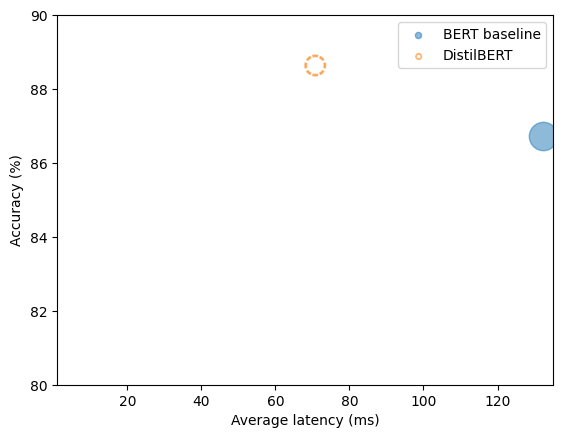

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_metrics(perf_metrics, current_optim_type):
    df = pd.DataFrame.from_dict(perf_metrics, orient='index')
    for idx in df.index:
        df_opt = df.loc[idx]
        # Add a dashed circle around the current optimization type
        if idx == current_optim_type:
            plt.scatter(df_opt["avg_time_in_ms"], df_opt["accuracy"] * 100,
            alpha=0.5, s=df_opt["size_mb"], label=idx,
            marker='$\u25CC$')
        else:
            plt.scatter(df_opt["avg_time_in_ms"], df_opt["accuracy"] * 100,
            s=df_opt["size_mb"], label=idx, alpha=0.5)
    legend = plt.legend(bbox_to_anchor=(1,1))
    for handle in legend.legendHandles:
        handle.set_sizes([20])
    plt.ylim(80,90)
    # Use the slowest model to define the x-axis range
    xlim = int(perf_metrics["BERT baseline"]["avg_time_in_ms"] + 3)
    plt.xlim(1, xlim)
    plt.ylabel("Accuracy (%)")
    plt.xlabel("Average latency (ms)")
    plt.show()
plot_metrics(performance_metrics, optim_type)

### Finding Good Hyperparameters with Optuna

To find good values for `α` and `T`, we could do a grid search over the 2D parameter space. But a much better alternative is to use `Optuna`, which is an optimization framework designed for just this type of task.

In Optuna, we can find the minimum of $f(x,y)$ by defining an `objective()` function that returns the value of $f(x,y)$:

In [59]:
def objective(trial):
    x = trial.suggest_float("x", -2, 2)
    y = trial.suggest_float("y", -2, 2)
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

The `trial.suggest_float` object specifies the parameter ranges to sample uniformly from; Optuna also provides `suggest_int` and `suggest_categorical` for integer and categorical parameters, respectively. Optuna collects multiple trials as a study, so to create one we just pass the `objective()` function to `study.optimize()` as follows:

In [61]:
! pip install optuna -Uqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.3 MB/s eta 0:00:00


In [62]:
import optuna

study = optuna.create_study()
study.optimize(objective, n_trials=1000)

[I 2023-12-30 21:26:35,010] A new study created in memory with name: no-name-1d7a15ae-dc16-462f-80f0-731bc72e1550
[I 2023-12-30 21:26:35,017] Trial 0 finished with value: 355.51630639506806 and parameters: {'x': -0.2291559266338128, 'y': -1.828990901979465}. Best is trial 0 with value: 355.51630639506806.
[I 2023-12-30 21:26:35,023] Trial 1 finished with value: 526.4656297791324 and parameters: {'x': 1.9010180210381629, 'y': 1.3211554122315015}. Best is trial 0 with value: 355.51630639506806.
[I 2023-12-30 21:26:35,026] Trial 2 finished with value: 1214.7739114825547 and parameters: {'x': 1.4642519359926536, 'y': -1.3410177476511862}. Best is trial 0 with value: 355.51630639506806.
[I 2023-12-30 21:26:35,028] Trial 3 finished with value: 40.259551548068146 and parameters: {'x': 1.0517934532417015, 'y': 0.4717864583734892}. Best is trial 3 with value: 40.259551548068146.
[I 2023-12-30 21:26:35,030] Trial 4 finished with value: 27.12736617481697 and parameters: {'x': 0.7862505249829721, 

Once the study is completed, we can then find the best parameters as follows:

In [63]:
study.best_params

{'x': 1.0316624807433843, 'y': 1.0644630853469046}

We see that with one thousand trials, Optuna has managed to find values for x and y that are reasonably close to the global minimum. To use Optuna in Transformers, we use similar logic by first defining the hyperparameter space that we wish to optimize over. In addition to α and T, we'll include the number of training epochs as follows:

In [64]:
def hp_space(trial):
    return {"num_train_epochs": trial.suggest_int("num_train_epochs", 5, 10),
    "alpha": trial.suggest_float("alpha", 0, 1),
    "temperature": trial.suggest_int("temperature", 2, 20)}

Running the hyperparameter search with the Trainer is then quite simple; we just need to specify the number of trials to run and a direction to optimize for. Because we want the best possible accuracy, we specify `direction="maximize"` in the `hyperparameter_search()` method of the trainer and pass the hyperparameter search
space as follows:

In [67]:
best_run = distilbert_trainer.hyperparameter_search(
    n_trials=20,
    direction="maximize",
    hp_space=hp_space
)

best_run

[I 2023-12-30 21:34:27,856] A new study created in memory with name: no-name-af863a39-e954-4f4e-801b-dcc886793780
[W 2023-12-30 21:34:27,861] Trial 0 failed with parameters: {'num_train_epochs': 5, 'alpha': 0.45134030819064497, 'temperature': 3} because of the following error: TypeError("'float' object is not iterable").
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/usr/local/lib/python3.10/dist-packages/transformers/integrations/integration_utils.py", line 199, in _objective
    trainer.train(resume_from_checkpoint=checkpoint, trial=trial)
  File "/usr/local/lib/python3.10/dist-packages/transformers/trainer.py", line 1484, in train
    self._hp_search_setup(trial)
  File "/usr/local/lib/python3.10/dist-packages/transformers/trainer.py", line 1178, in _hp_search_setup
    value = type(old_attr)(value)
TypeError: 'float' object is not iterable
[W 2023-12-30

TypeError: ignored

# Making Models Faster with Quantization

* **Quantization**: To make the `model smaller` and `faster`, we can use quantization, which converts the model weights and activations from `32-bit floating point (FP32) to 8-bit integer (INT8)`. This `reduces the number of bits by four times`, which means `less memory usage` and `faster calculations`.
    * Quantization can be done `without hurting the model accuracy too much`.

* **Benefits of quantization**: Quantization helps us `save memory` and `time` when running the model. By using `INT8` instead of `FP32`, we can shrink the model size by `75%` and `speed up the operations like matrix multiplication`.
    * Quantization also makes the model more compatible with low-power devices like mobile phones or microcontrollers.
    
    * Quantization usually **preserves the model quality**, or only slightly reduces it.